Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')


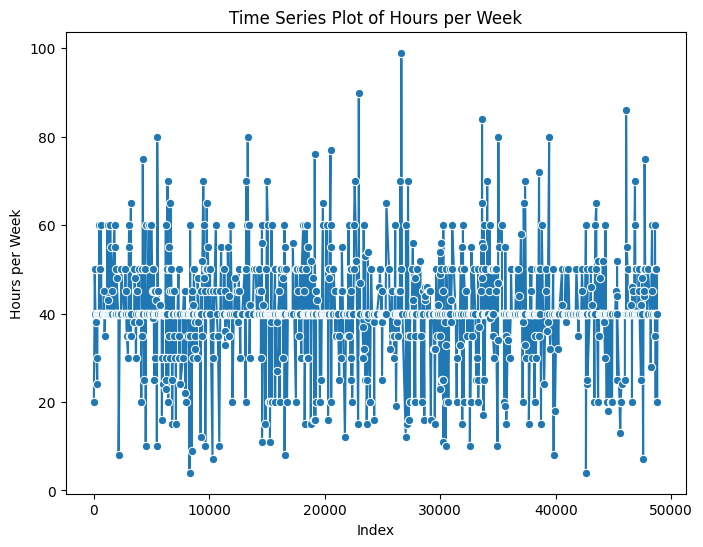

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the CSV file
file_path = "/content/income.csv"
df = pd.read_csv(file_path)

# Feature Selection
numerical_features = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
print(df.columns)
# Encode categorical target variable
df["income_level"] = LabelEncoder().fit_transform(df["income_level"])
# Remove missing values
df = df.dropna()

# Time Series Plot (assuming row index is time-like)
df["Index"] = df.index
plt.figure(figsize=(8, 6))
sns.lineplot(x="Index", y="hours_per_week", data=df.sample(1000), marker="o")
plt.title("Time Series Plot of Hours per Week")
plt.xlabel("Index")
plt.ylabel("Hours per Week")
plt.show()


In [17]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,Index
0,39,77516,13,2174,0,40,0,0
1,50,83311,13,0,0,13,0,1
2,38,215646,9,0,0,40,0,2
3,53,234721,7,0,0,40,0,3
4,28,338409,13,0,0,40,0,4


In [18]:
df.income_level.value_counts()

,count
income_level,
0,37155
1,11687


In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X=df.drop('income_level',axis=1)
y=df['income_level']
X_smote,y_smote=smote.fit_resample(X,y)

In [23]:
X_smote.shape,y_smote.shape

((74310, 7), (74310,))

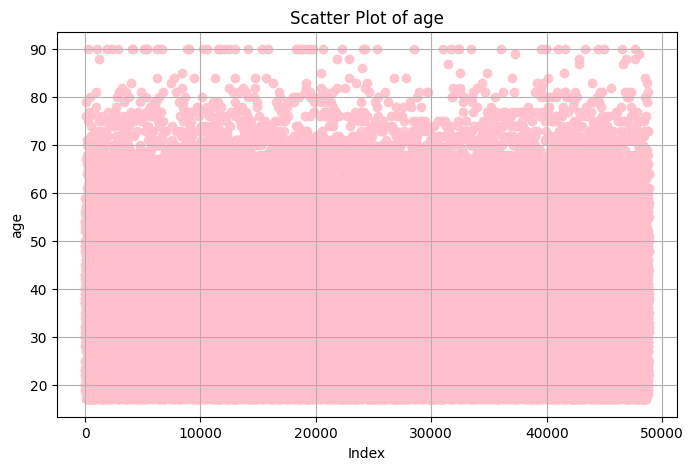

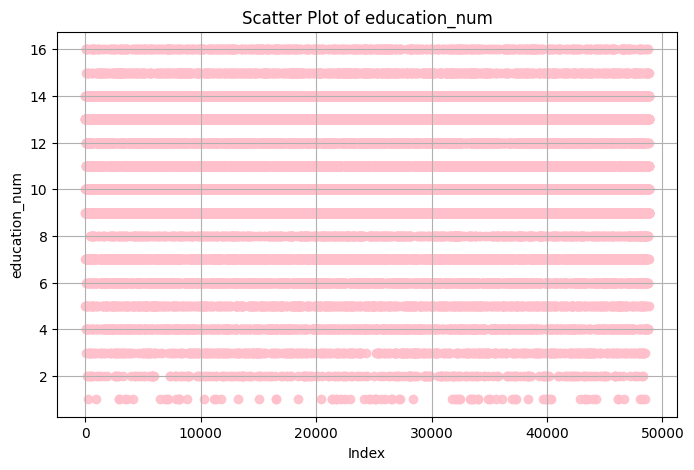

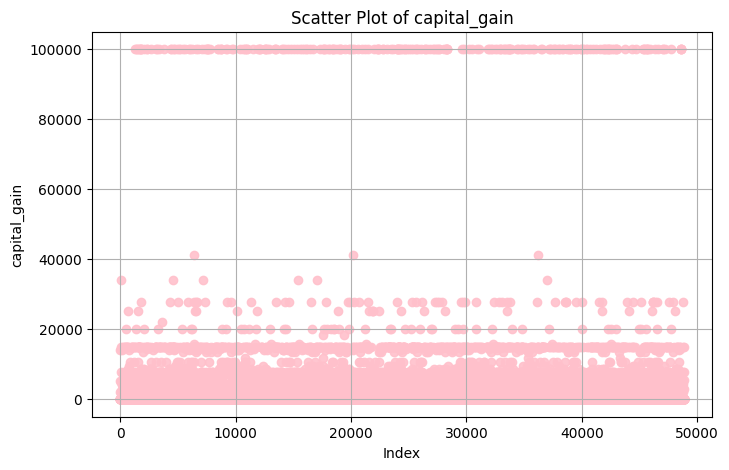

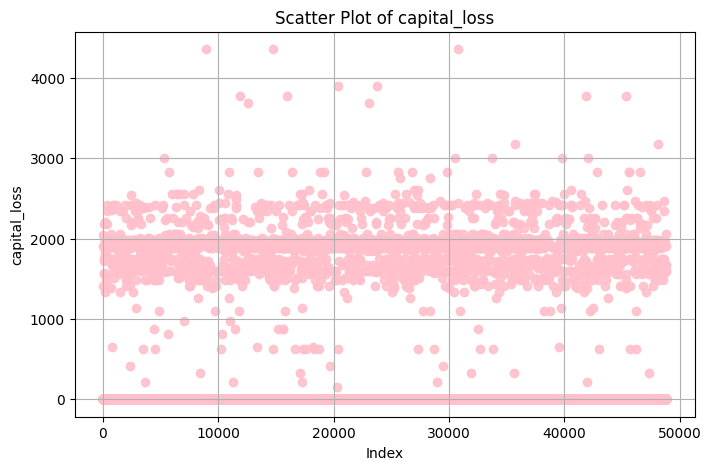

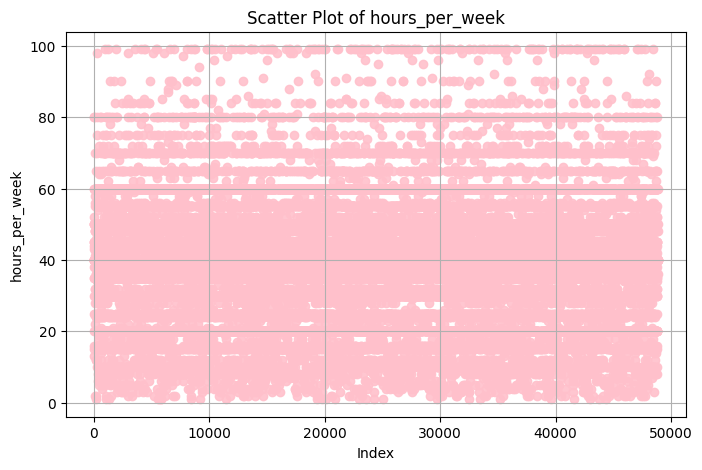

In [3]:
selected_features = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

# Generate scatter plots separately for each column
for col in selected_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df.index, df[col], alpha=0.9, color='pink')
    plt.title(f"Scatter Plot of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

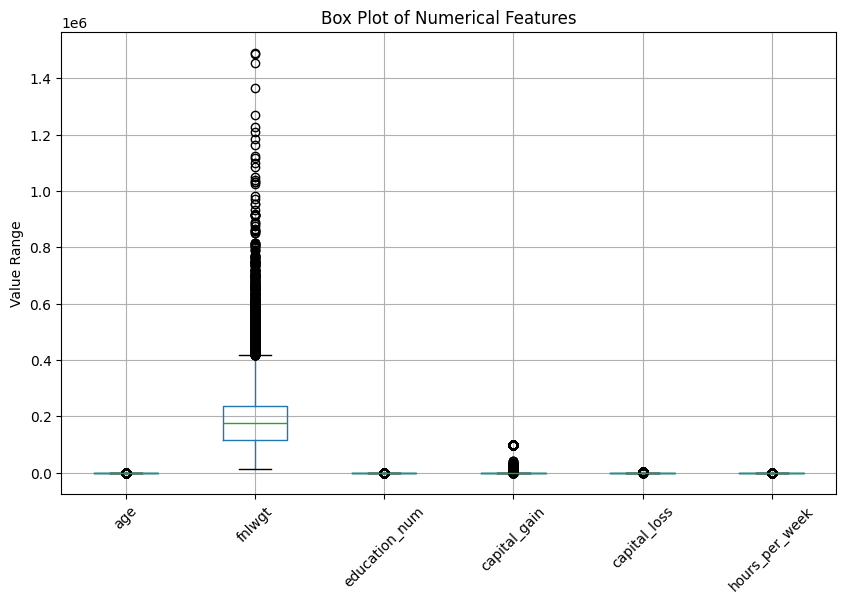

In [4]:
import matplotlib.pyplot as plt

# Selecting only numerical features
numerical_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

# Creating the box plot
plt.figure(figsize=(10, 6))
df[numerical_features].boxplot()
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.ylabel("Value Range")
plt.show()

In [5]:
# Detect Outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_outliers = df[outliers]
print("\nDetected Outliers:")
print(df_outliers[numerical_features].head())


Detected Outliers:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
6   49  160187              5             0             0              16
8   31   45781             14         14084             0              50
9   42  159449             13          5178             0              40


In [6]:
#removing outliers
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtering data
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
df_cleaned = remove_outliers(df, numerical_features)

# Show the shape of the dataset before and after outlier removal
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after outlier removal: {df_cleaned.shape}")

Original dataset size: (48842, 8)
Dataset size after outlier removal: (28560, 8)


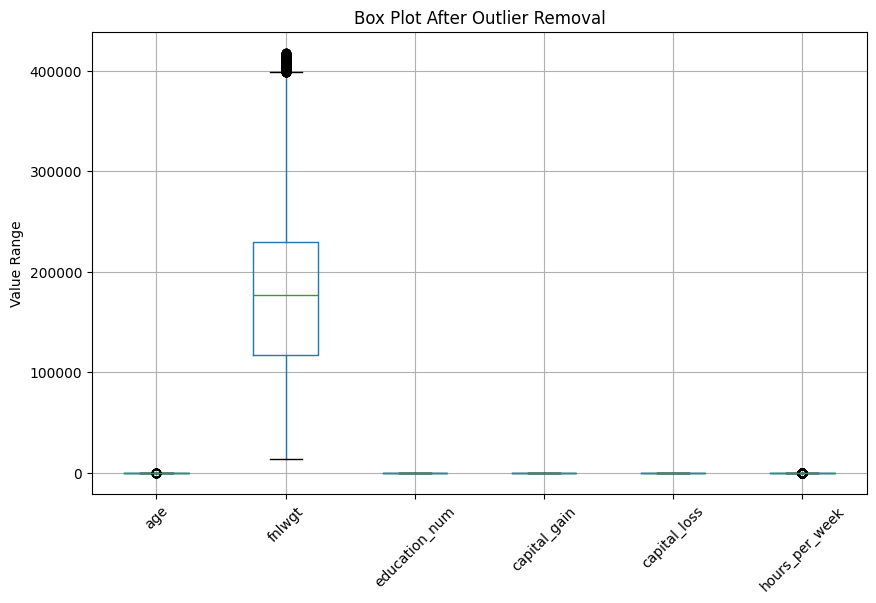

In [7]:
# Box plot after removing outliers
# Outlier Removal Function
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
plt.figure(figsize=(10, 6))
df_cleaned[numerical_features].boxplot()
plt.title("Box Plot After Outlier Removal")
plt.xticks(rotation=45)
plt.ylabel("Value Range")
plt.show()

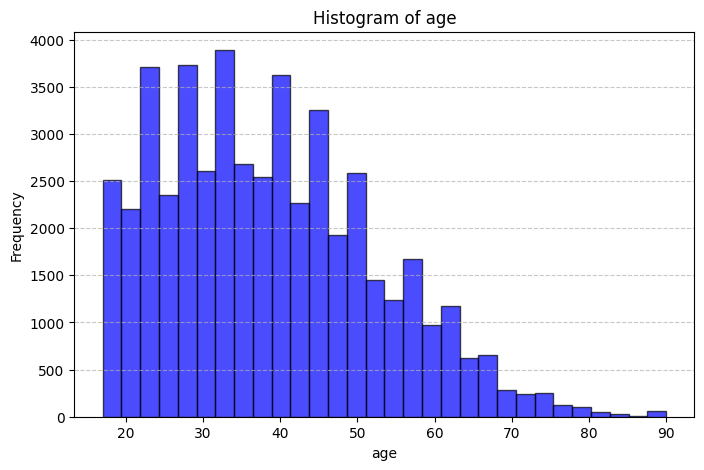

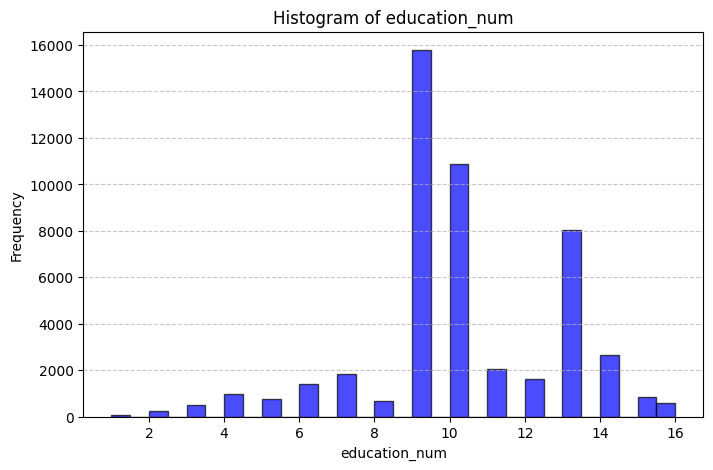

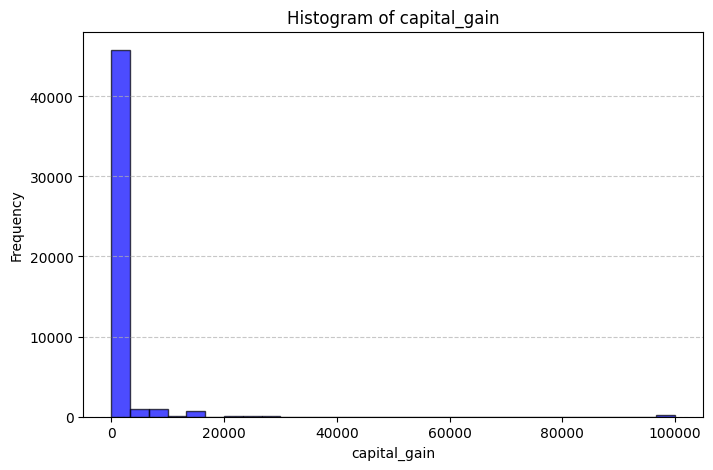

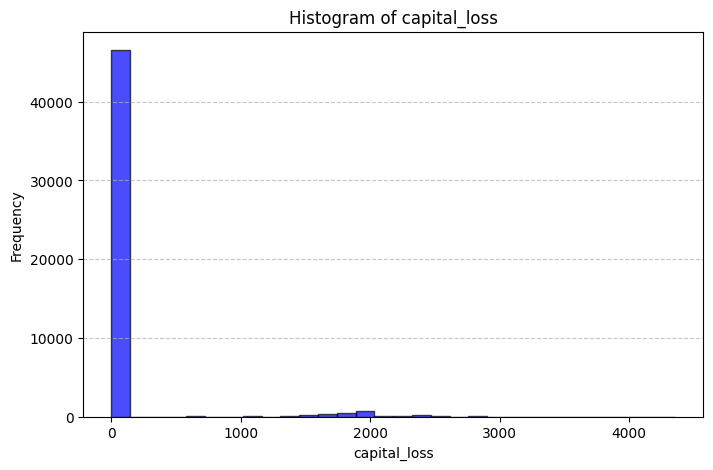

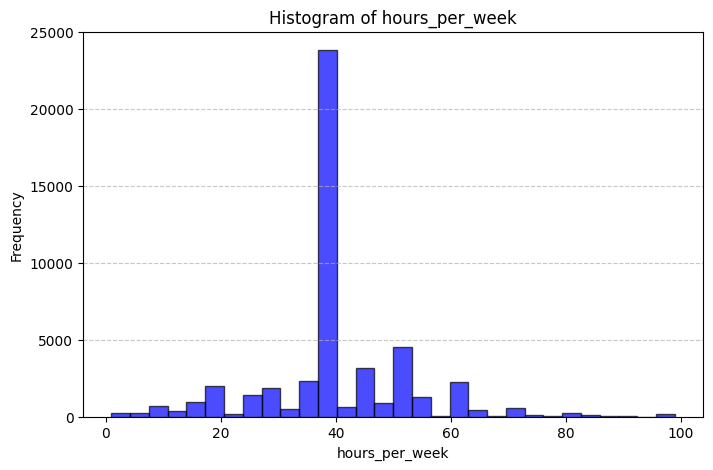

In [8]:
# Generate histograms separately for each column
for col in selected_features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

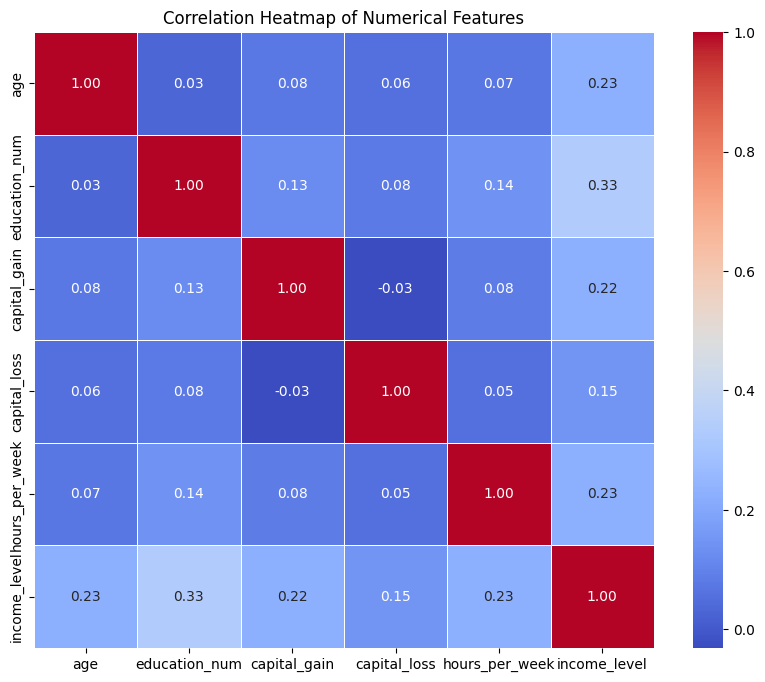

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select numerical features for correlation analysis
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_level']
correlation_matrix = df[numerical_features].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [10]:
# Select all numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness for each numerical feature
skewness_values = df[numerical_features].skew()

# Print skewness values
print("Skewness of Numerical Features:")
print(skewness_values)

Skewness of Numerical Features:
age                0.557580
fnlwgt             1.438892
education_num     -0.316525
capital_gain      11.894659
capital_loss       4.569809
hours_per_week     0.238750
income_level       1.222216
Index              0.000000
dtype: float64


In [11]:
# Select all numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate kurtosis for each numerical feature
kurtosis_values = df[numerical_features].kurtosis()

# Print kurtosis values
print("Kurtosis of Numerical Features:")
print(kurtosis_values)

Kurtosis of Numerical Features:
age                -0.184269
fnlwgt              6.057848
education_num       0.625745
capital_gain      152.693096
capital_loss       20.014346
hours_per_week      2.951059
income_level       -0.506208
Index              -1.200000
dtype: float64


In [24]:
# Model Training (Basic Level)
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report
X = df[numerical_features]
y = df["income_level"]
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42) # Added stratify=y

# Using Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      7494
           1       0.81      0.85      0.83      7368

    accuracy                           0.83     14862
   macro avg       0.83      0.83      0.83     14862
weighted avg       0.83      0.83      0.83     14862

Random Forest Accuracy: 0.8292


In [25]:
rf_clf.score(X_test, y_test)

0.8291616202395371

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {knn_accuracy:.4f}")

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.74      0.66      0.70      7494
           1       0.69      0.77      0.73      7368

    accuracy                           0.71     14862
   macro avg       0.72      0.71      0.71     14862
weighted avg       0.72      0.71      0.71     14862

KNN Accuracy: 0.7138


In [28]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import xgboost

# Selecting numerical and categorical features
numerical_features = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]


# Splitting dataset

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgboost.XGBClassifier() # changed to XGBClassifier
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_xgboost = model.predict(X_test)
rgboost_accuracy = accuracy_score(y_test, y_pred_xgboost) #changed to XGBoost and assigned to rgboost_accuracy
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgboost)) # Changed y_pred_rf to y_pred_xgboost
print(f"XGBoost Accuracy: {rgboost_accuracy:.4f}") #changed to XGBoost

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      7494
           1       0.83      0.81      0.82      7368

    accuracy                           0.82     14862
   macro avg       0.82      0.82      0.82     14862
weighted avg       0.82      0.82      0.82     14862

XGBoost Accuracy: 0.8225


In [30]:
df.income_level.unique()

array([0, 1])

In [32]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Selecting numerical and categorical features
numerical_features = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

# Encoding target variable
#df_encoded["income_level"] = LabelEncoder().fit_transform(df["income_level"])  # 0: <=50K, 1: >50K

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Standardize numerical features for SVM
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train SVM model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Classification Report (SVM Accuracy):\n", classification_report(y_test, y_pred_svm)) # Changed y_pred_rf to y_pred_svm
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Classification Report (SVM Accuracy):
               precision    recall  f1-score   support

           0       0.54      0.42      0.47      7494
           1       0.52      0.63      0.57      7368

    accuracy                           0.53     14862
   macro avg       0.53      0.53      0.52     14862
weighted avg       0.53      0.53      0.52     14862

SVM Accuracy: 0.5262


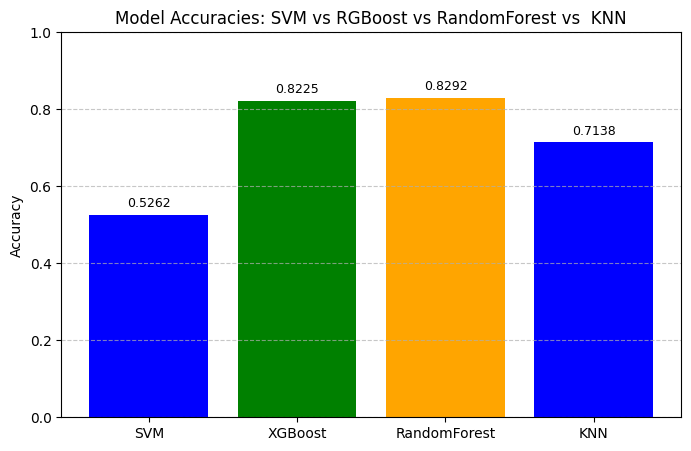

In [33]:
# Selecting numerical and categorical features
numerical_features = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
# Plot accuracies
models = ["SVM", "XGBoost", "RandomForest", "KNN"]
accuracies = [accuracy_svm, rgboost_accuracy, rf_accuracy,  knn_accuracy,]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["blue", "green", "orange"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracies: SVM vs RGBoost vs RandomForest vs  KNN")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display accuracy values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha="center", fontsize=9)

plt.show()

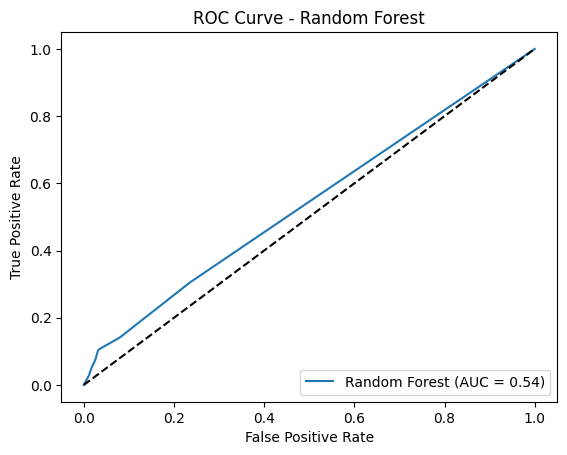

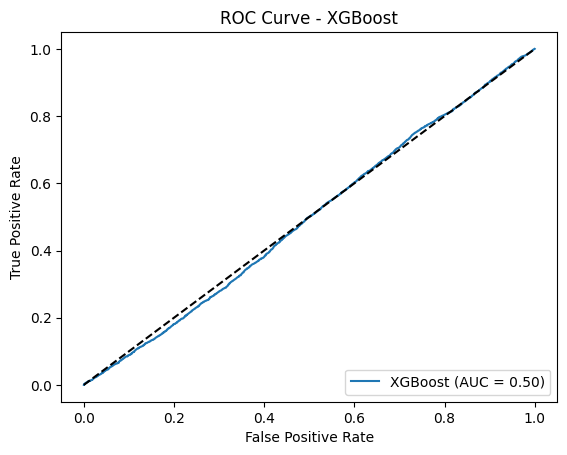

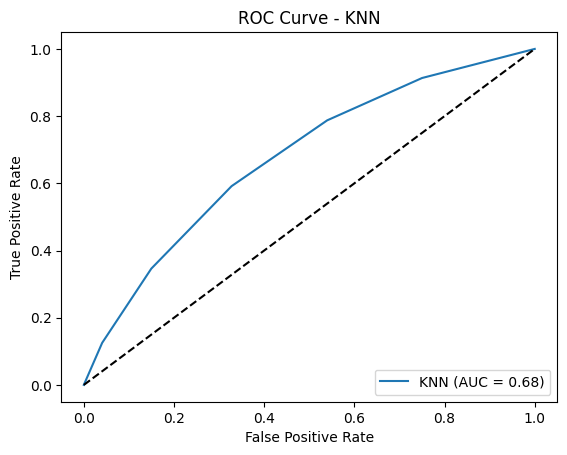

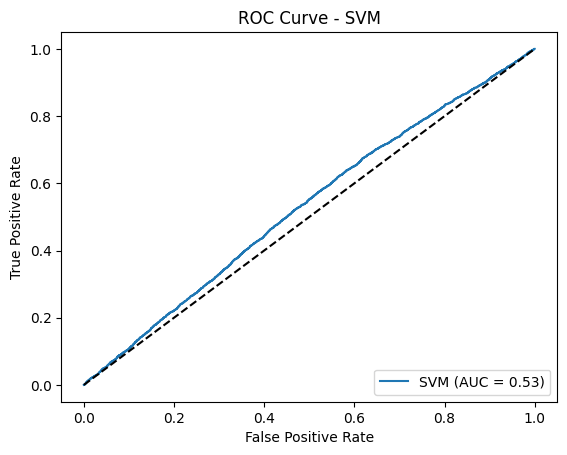

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for each model
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
y_pred_prob_xgboost = model.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_pred_prob_svm = svm_model.decision_function(X_test)  # Use decision_function for SVM

# Plot ROC curves for each model
plot_roc_curve('Random Forest', y_test, y_pred_prob_rf)
plot_roc_curve('XGBoost', y_test, y_pred_prob_xgboost)
plot_roc_curve('KNN', y_test, y_pred_prob_knn)
plot_roc_curve('SVM', y_test, y_pred_prob_svm)

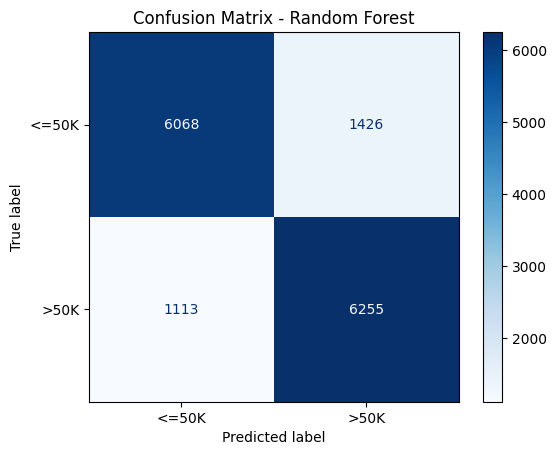

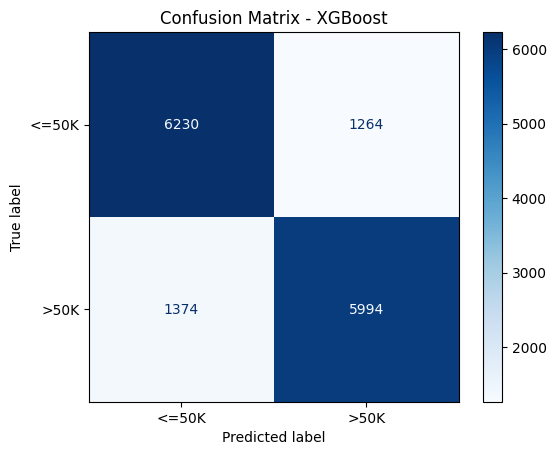

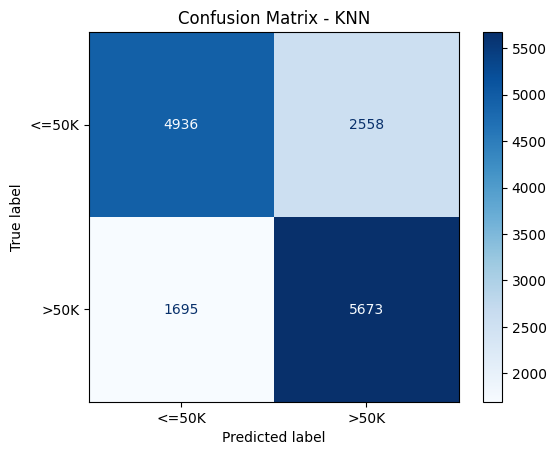

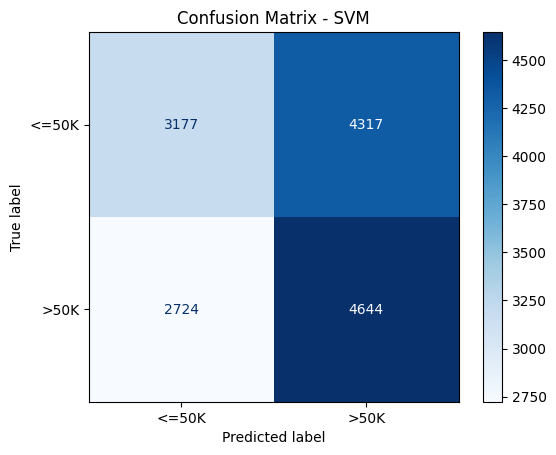

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained models: rf_clf, model (XGBoost), logreg_model, knn_model, svm_model
# and corresponding predictions: y_pred_rf, y_pred_xgboost, y_pred_logreg, y_pred_knn, y_pred_svm

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix('Random Forest', y_test, y_pred_rf)
plot_confusion_matrix('XGBoost', y_test, y_pred_xgboost)
plot_confusion_matrix('KNN', y_test, y_pred_knn)
plot_confusion_matrix('SVM', y_test, y_pred_svm)